# Problem Statement: What kind of prediction model with an accuracy of 80% or more, can we make that can help us increase profits in geographical areas and predict future sales trends in the next 30 days?

# Data Wrangling: Clean the data, get rid of missing values and duplicates.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import chardet

In [4]:
with open('Downloads/Capstone_Two_Project/Sample - Superstore.csv', 'rb') as f:
    result = chardet.detect(f.read(10000)) #sample 10KB
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
df = pd.read_csv('Downloads/Capstone_Two_Project/Sample - Superstore.csv', encoding='ISO-8859-1')

In [6]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

We have 21 columns of data to work with.

In [7]:
df.shape

(9994, 21)

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#Check columns with missing info
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

The columns "Order Date" and "Ship Date" are in the wrong format and need to be converted to datetime objects.

In [13]:
#Convert columns to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
for col in ['Category']:
    print(df[col].value_counts())

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


Most products consumers buy are in the office supplies category.

In [15]:
for col2 in ['Region']:
    print(df[col2].value_counts())

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


The West region has the highest volume of sales.

In [16]:
for col3 in ['City']:
    print(df[col3].value_counts())

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64


New York City and Los Angeles have the most product sales compared to other cities.

In [17]:
#Number of Distinct cities
df[['City']].nunique()

City    531
dtype: int64

In [18]:
#Numerical data
num_col = ['Sales', 'Quantity', 'Discount', 'Profit']
num_data = df[num_col]
num_data

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [19]:
#Categorical Data
cat_col = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
cat_data = df[cat_col]
cat_data

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


In [20]:
df['Segment'].unique()    

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [21]:
for col4 in ['Segment']:
    print(df[col4].value_counts())

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


# Exploratory Data Analysis: Find Patterns. Find which products, regions, and customers are truly profitable.

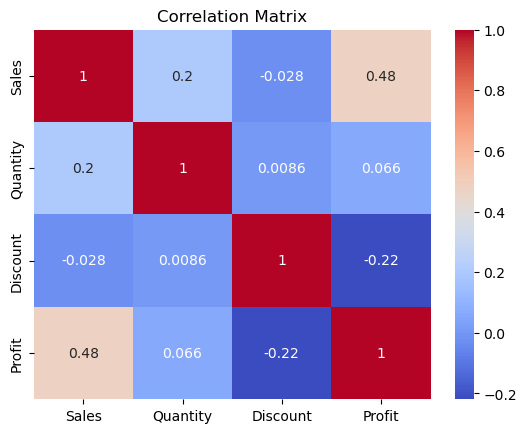

In [22]:
#Correlation Heatmap
sns.heatmap(num_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

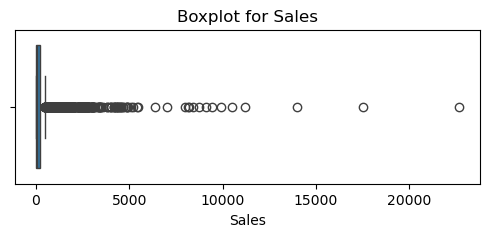

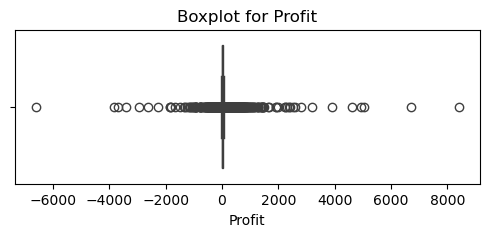

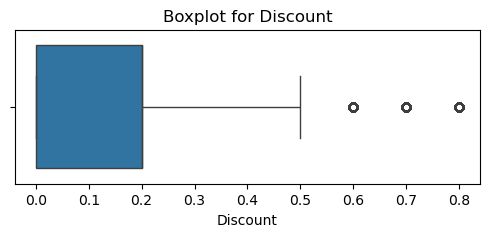

In [23]:
#Box Plots
for col in ['Sales', 'Profit', 'Discount']:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

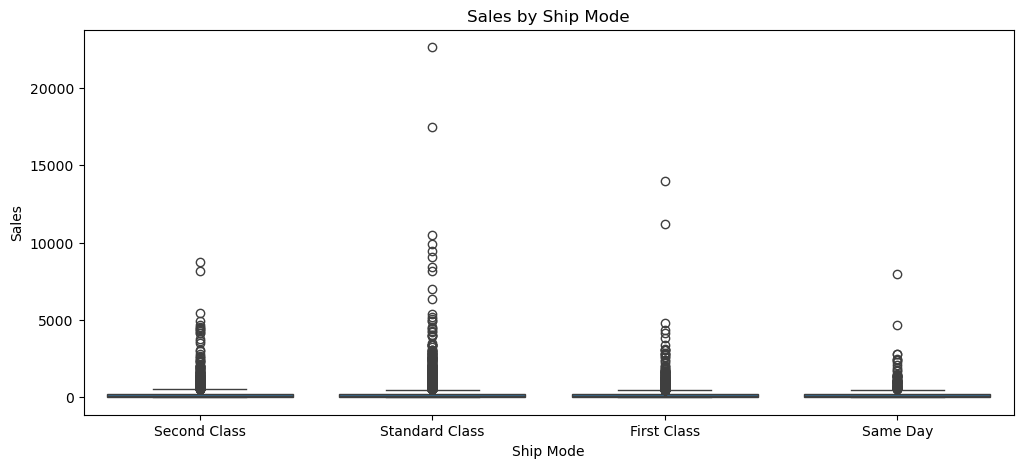

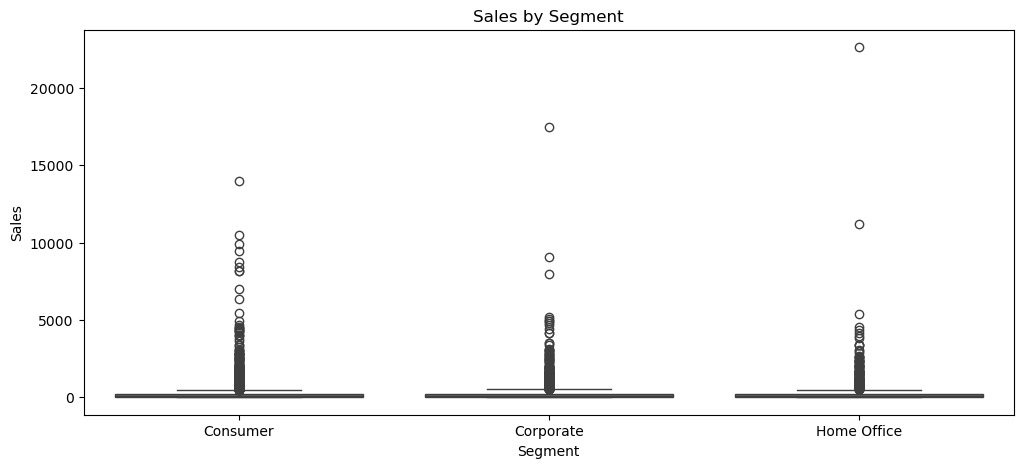

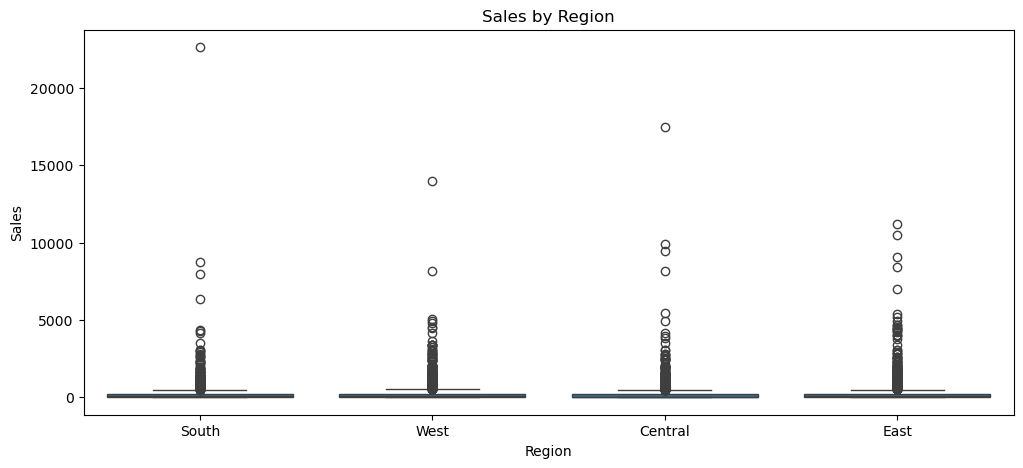

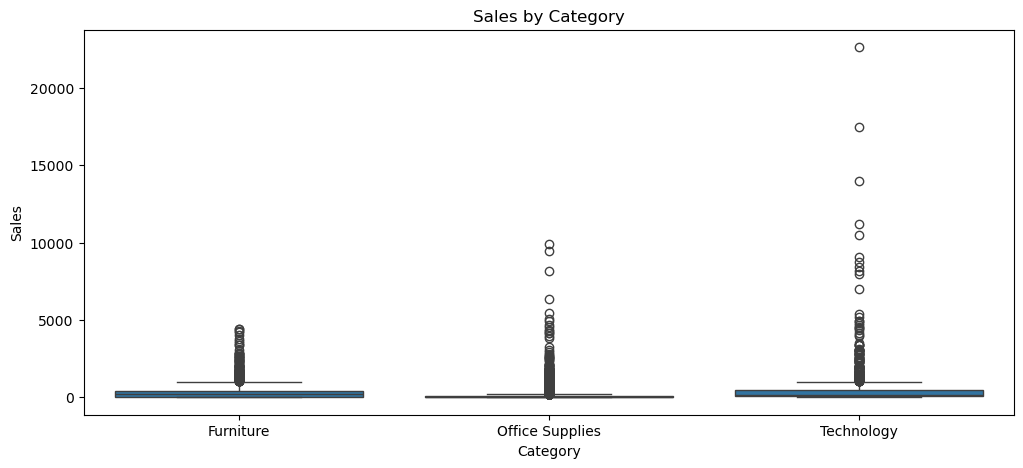

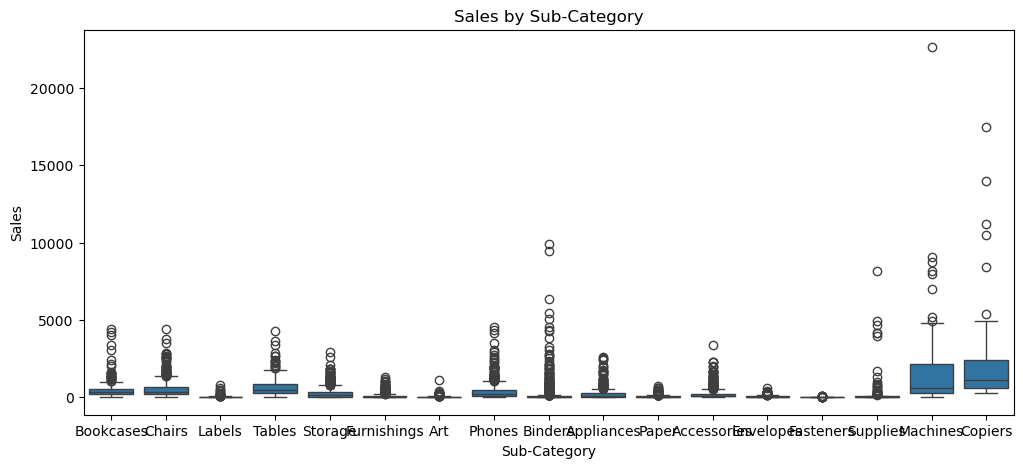

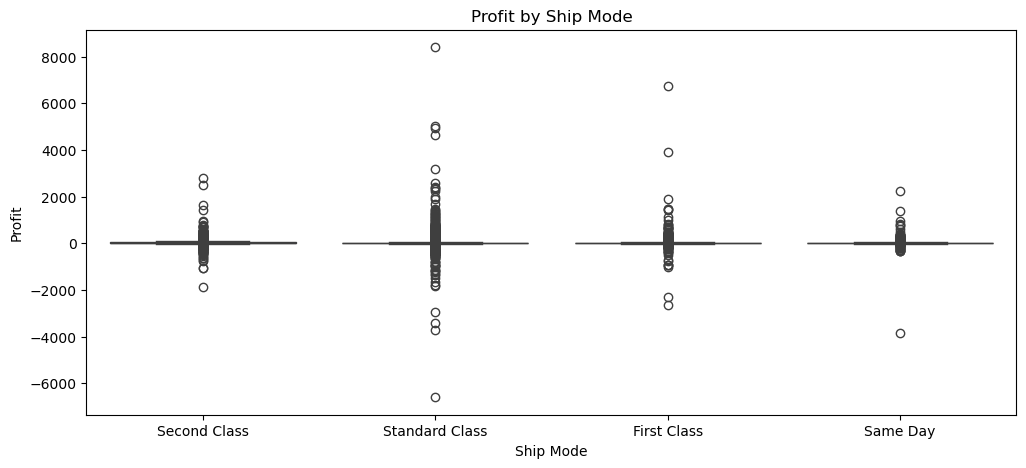

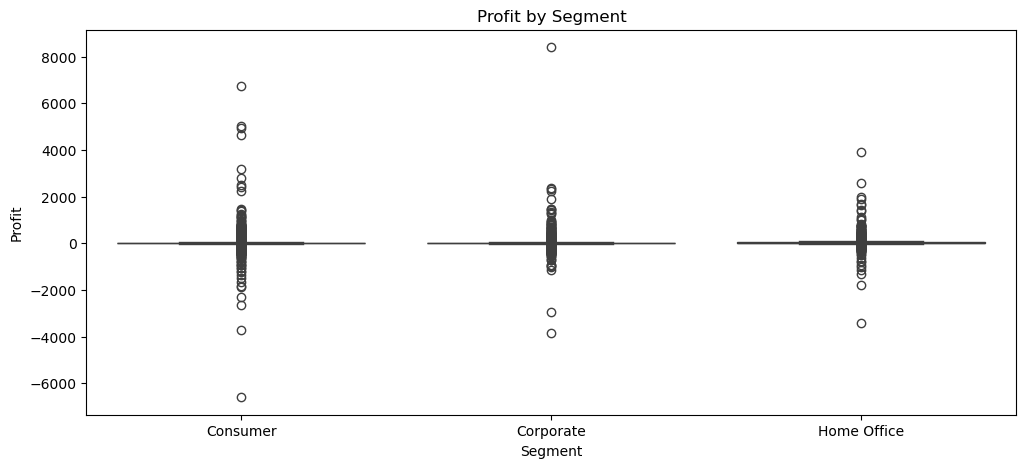

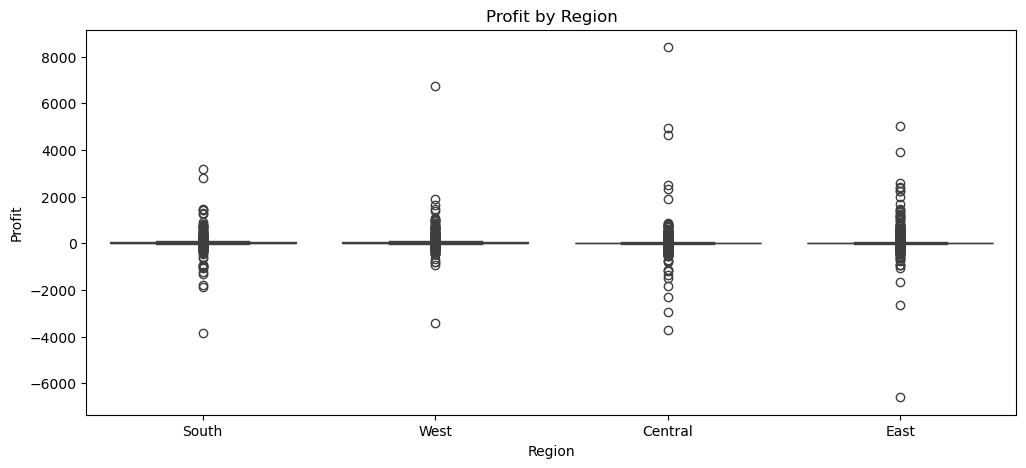

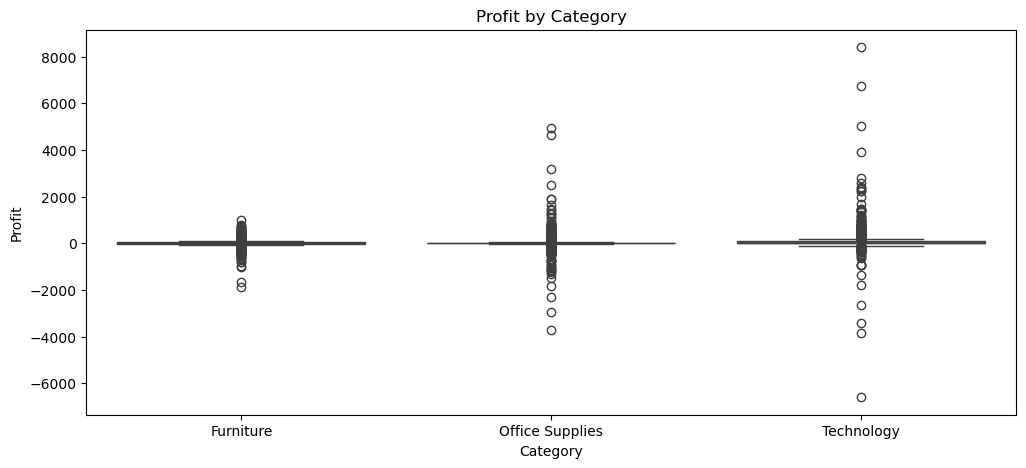

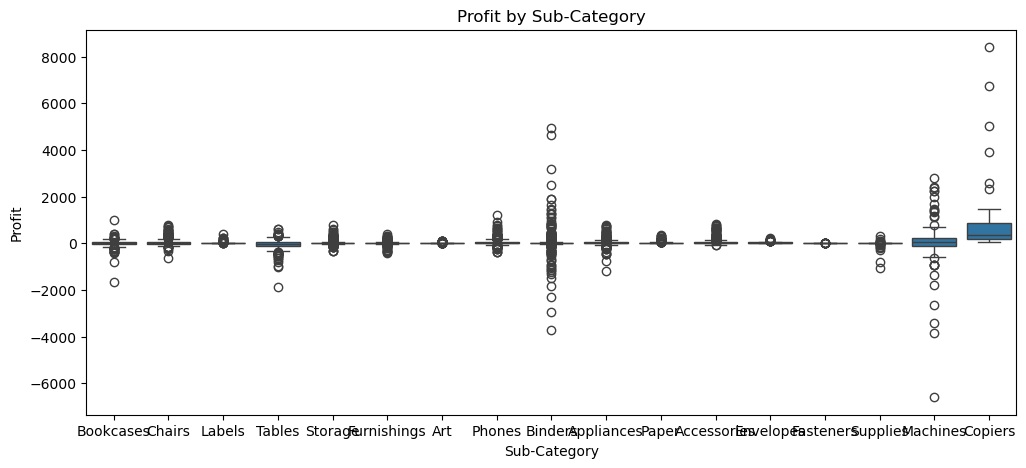

In [24]:
for i in 'Sales','Profit':
    for j in 'Ship Mode','Segment','Region','Category','Sub-Category':
        plt.figure(figsize=(12,5))
        sns.boxplot(x=j, y=i, data=df,width=0.8)
        plt.title(i+" by "+j)
        plt.show()

So far we see that machines and copiers have the most amount of sales, with copiers being the most profitable.

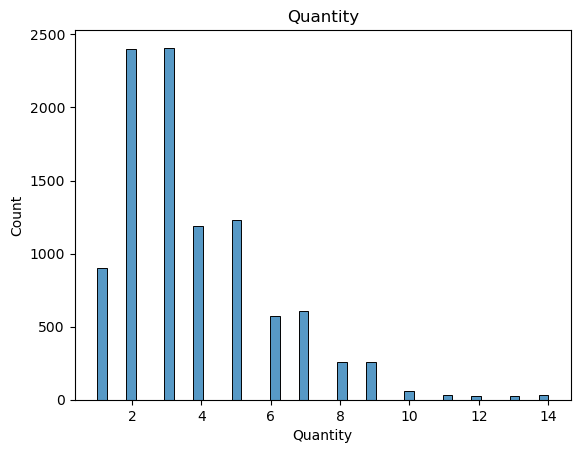

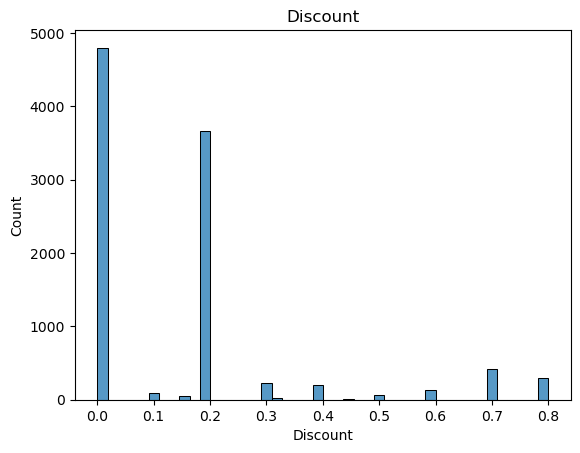

In [25]:
sns.histplot(df['Quantity'])
plt.title('Quantity')
plt.show()

sns.histplot(df['Discount'])
plt.title('Discount')
plt.show()

Most consumers buy between 2-3 items of a product.

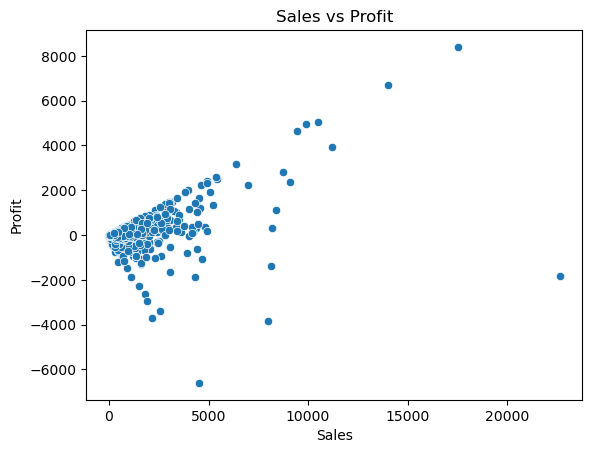

In [26]:
#Profitability Analyis
sns.scatterplot(df,x='Sales',y='Profit')
plt.title('Sales vs Profit')    
plt.show()

In [27]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['OrderY'] = df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month

In [28]:
df['Discounted Sales'] = df['Sales'] * (1 - df['Discount'])
df['Sales per Quantity'] = df['Sales'] / df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days 

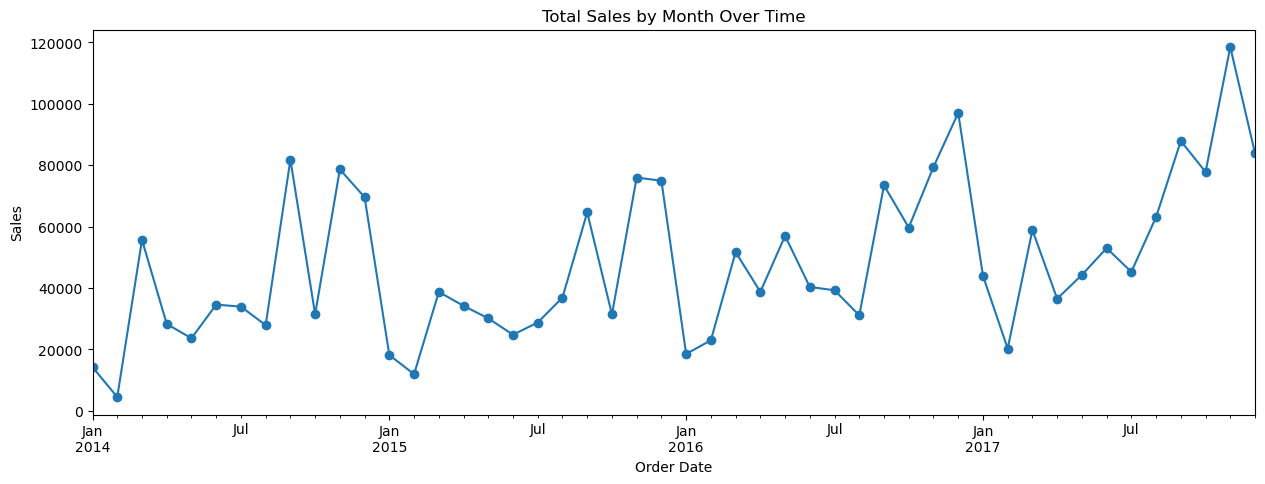

In [29]:
sales_month = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(15,5))
sales_month.plot(marker='o')
plt.title('Total Sales by Month Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

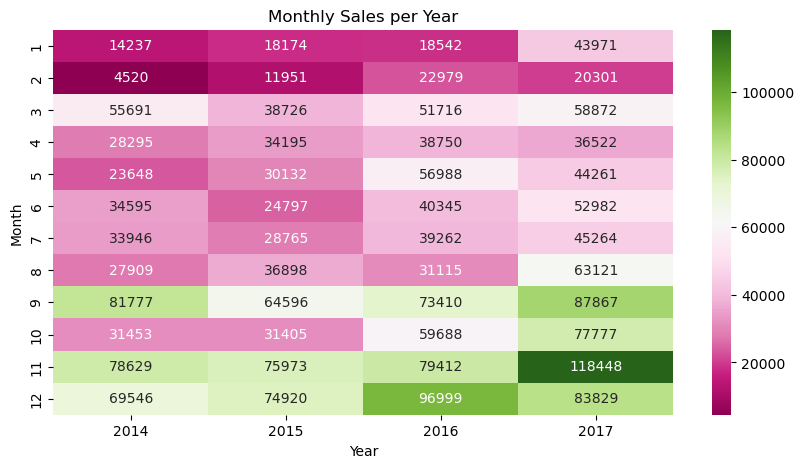

In [30]:
#Monthly Sales per Year Heatmap
pivot = df.pivot_table(index='OrderM', columns='OrderY', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='PiYG')
plt.title('Monthly Sales per Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

The monthly sales trend shows sales spikes in December of each year, reaching record highs in December 2017. This pattern strongly suggests that end-of-year holiday promotions and campaigns are the primary drivers of sales growth.

Additionally, there are noticeable dips in sales during the spring and late summer months, indicating where possible customer demand has decreased.

To capitalize on these trends, the company should invest more in marketing of the holiday season to maximize profits.

For the spring and summer months, launching targeted promotions or new product releases could help smooth out sales fluctuations and maintain steady revenue throughout the year.

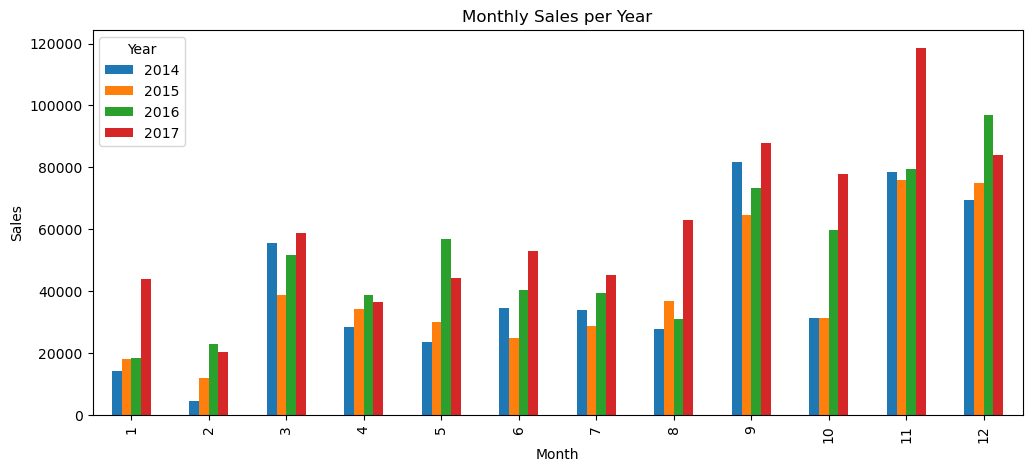

In [31]:
#Bar Plot
pivot.plot(kind='bar', figsize=(12,5))
plt.title('Monthly Sales per Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

C:\Users\mchar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


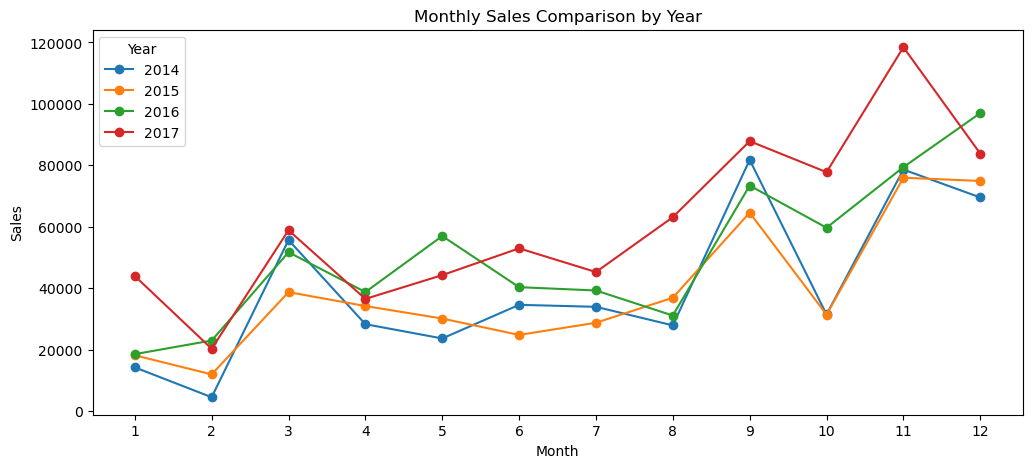

In [32]:
#Line Plot
plt.figure(figsize=(12,5))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))

plt.title('Monthly Sales Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.xticks(pivot.index)
plt.show()  

In [67]:
#Business Metrics Evaluation
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df.groupby('Order ID')['Sales'].sum().mean()
total_orders = df['Customer ID'].count()
unique_customers = df['Customer ID'].nunique()

print('Business Metrics Evaluation:')
print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {unique_customers}")

Business Metrics Evaluation:
Total Sales: 2,297,200.86
Total Profit: 286,397.02
Average Order Value: 458.61
Total Orders: 9994
Unique Customers: 793


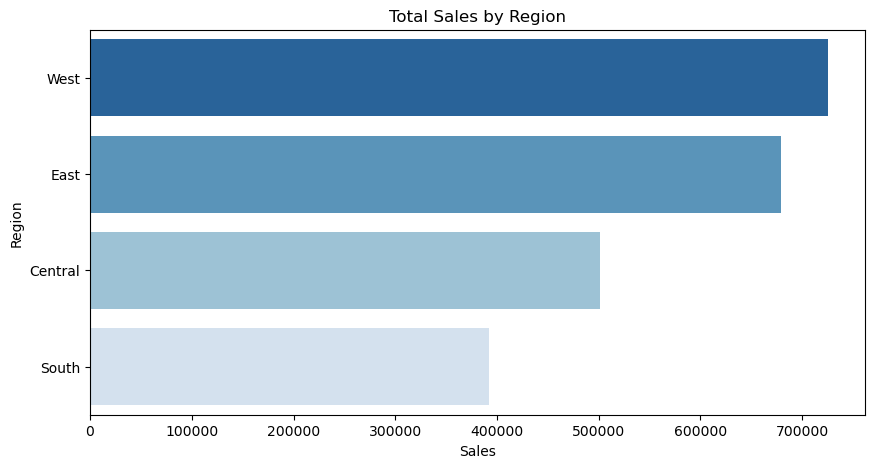

In [34]:
#Analysis of Sales by Region
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions_df = top_regions.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_regions_df,
    x='Sales',
    y='Region',
    hue='Region',
    palette='Blues_r')

plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

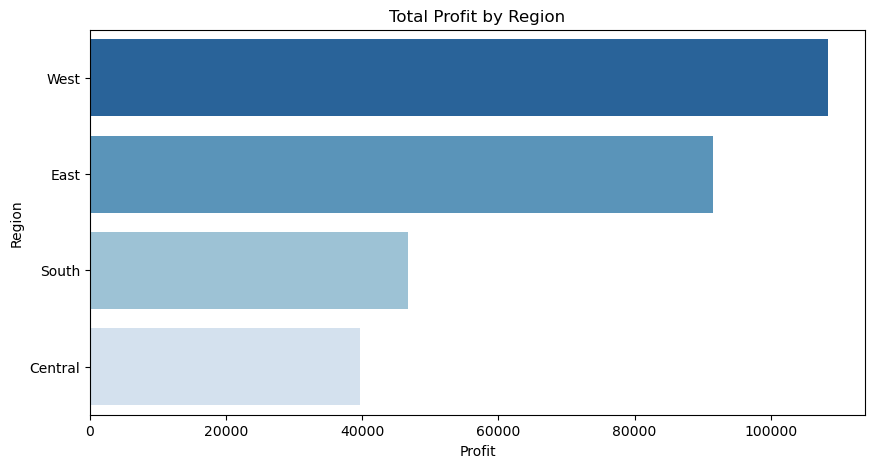

In [35]:
#Analysis of Profitability by Region
top_regions = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
top_regions_df = top_regions.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_regions_df,
    x='Profit',
    y='Region',
    hue='Region',
    palette='Blues_r')

plt.title('Total Profit by Region')
plt.xlabel('Profit')
plt.ylabel('Region')
plt.show()

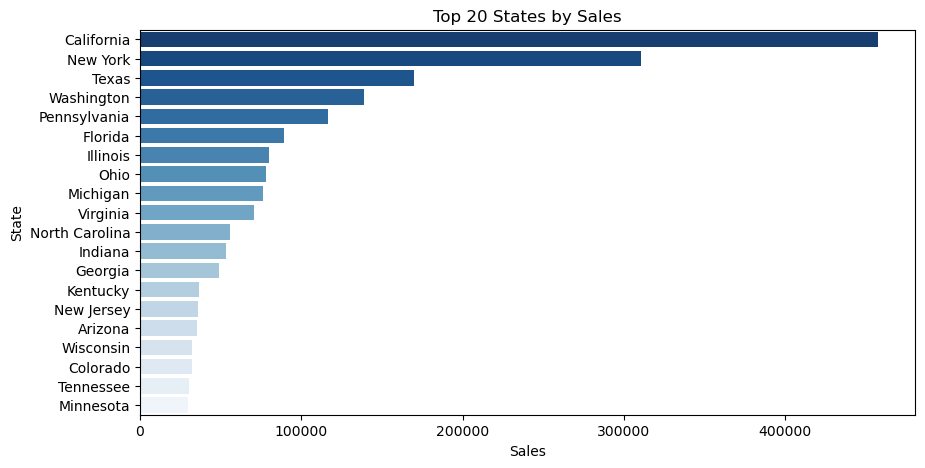

In [36]:
#Analysis of Sales by State
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
top_states_df = top_states.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_states_df,
    x='Sales',
    y='State',
    hue='State',
    palette='Blues_r')

plt.title('Top 20 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

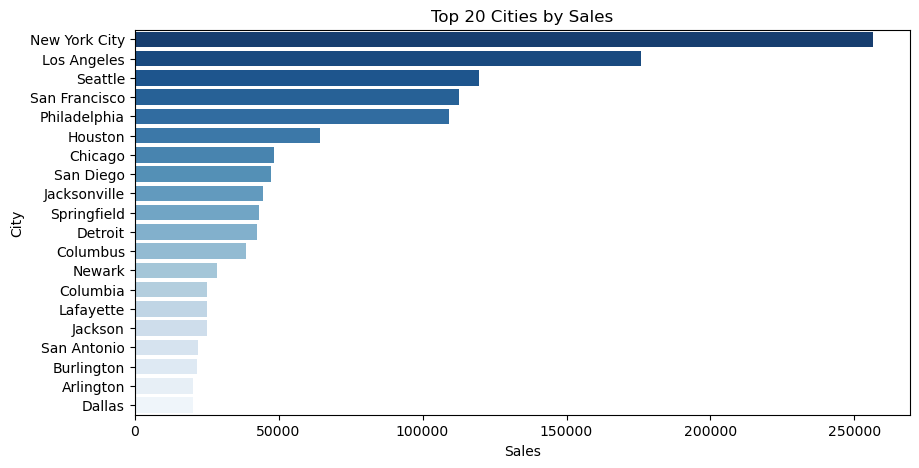

In [37]:
#Analysis of Sales by City
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
top_cities_df = top_cities.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_cities_df,
    x='Sales',
    y='City',
    hue='City',
    palette='Blues_r')

plt.title('Top 20 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

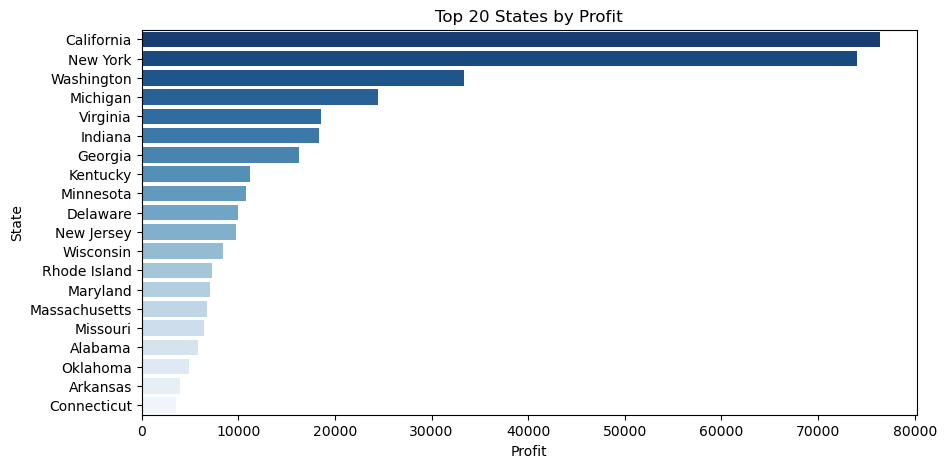

In [38]:
#Analysis of Profit by State
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)
top_states_df = top_states.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_states_df,
    x='Profit',
    y='State',
    hue='State',
    palette='Blues_r')

plt.title('Top 20 States by Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

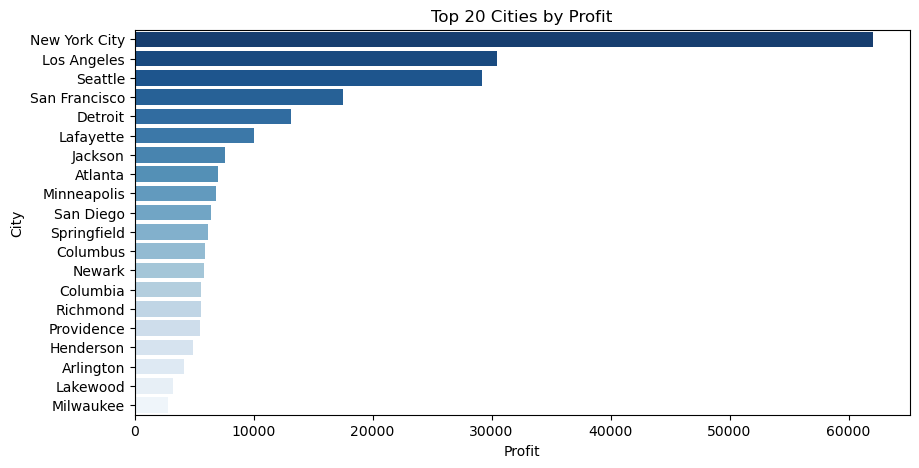

In [39]:
#Analysis of Profit by City
top_cities = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)
top_cities_df = top_cities.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_cities_df,
    x='Profit',
    y='City',
    hue='City',
    palette='Blues_r')
plt.title('Top 20 Cities by Profit')
plt.xlabel('Profit')
plt.ylabel('City')
plt.show()

We see that the most profitable region is the West with California contributing the most profits.

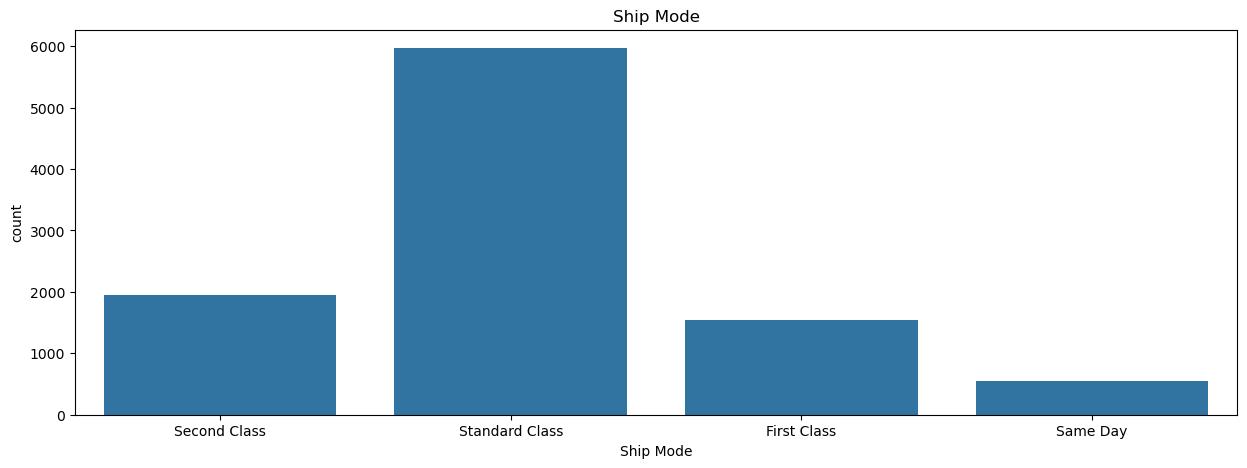

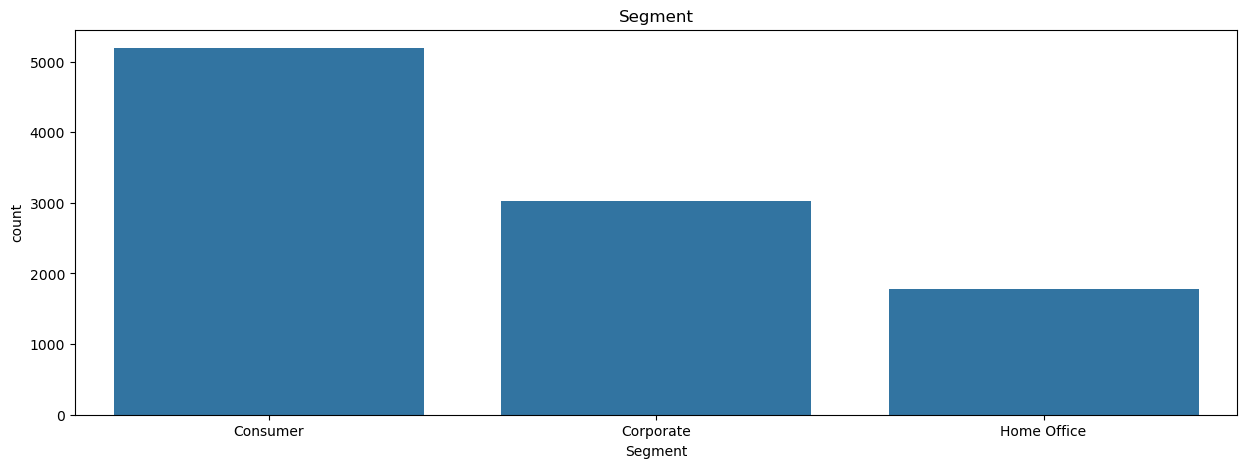

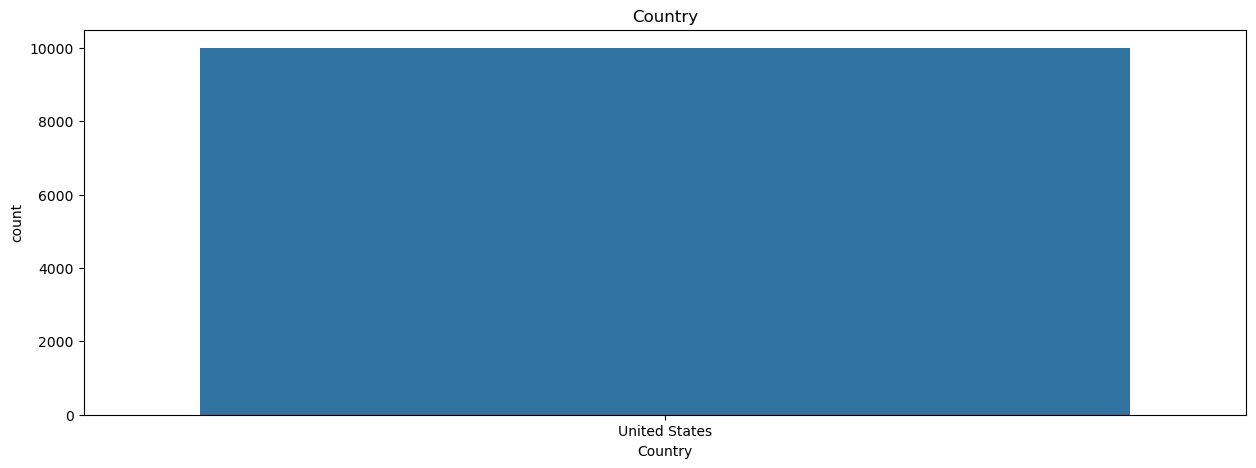

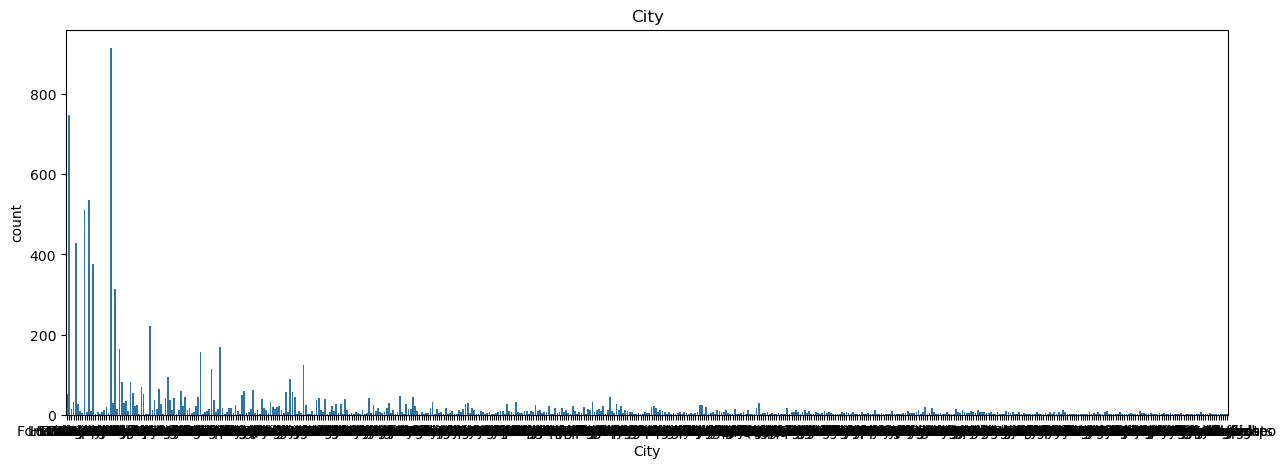

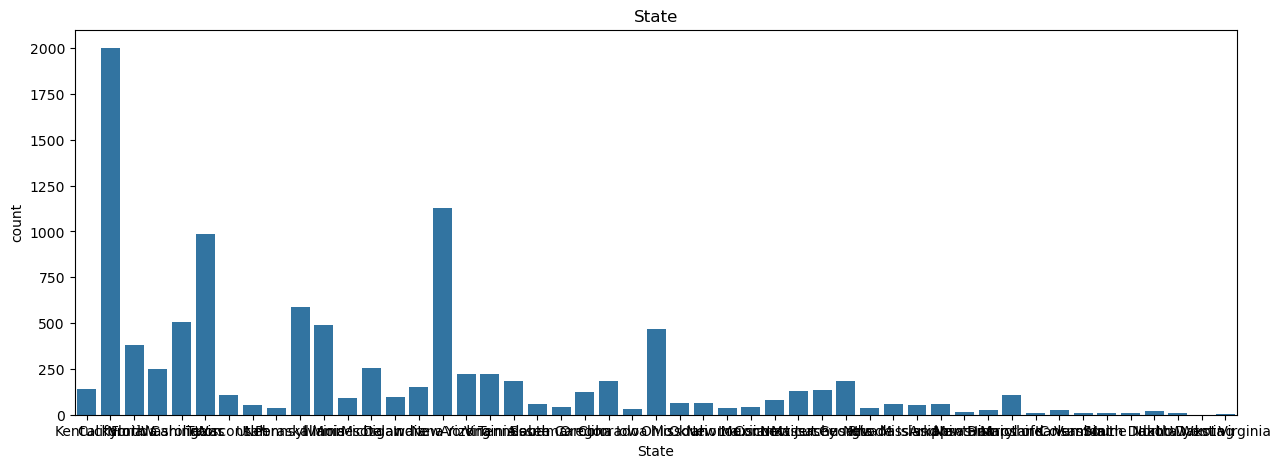

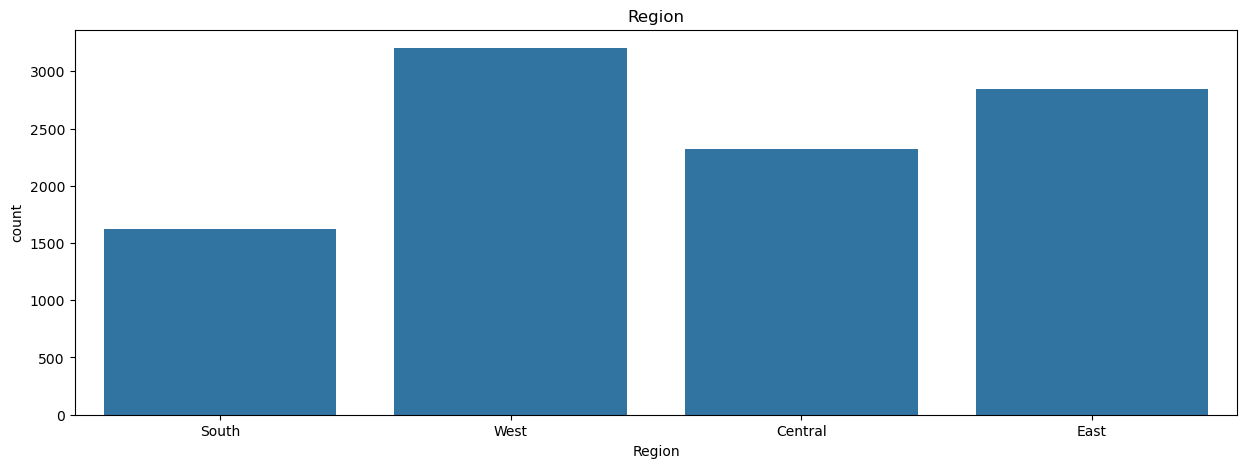

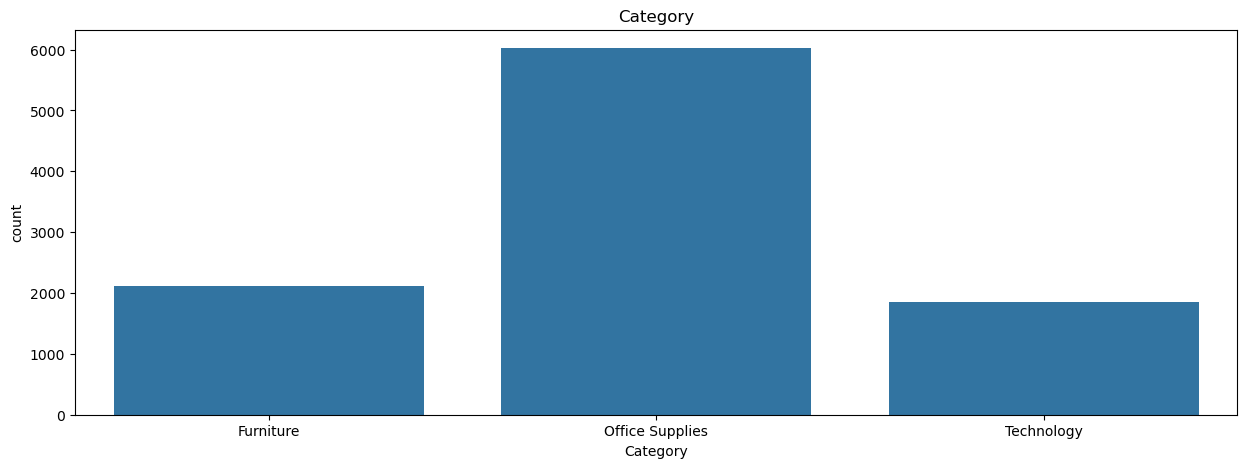

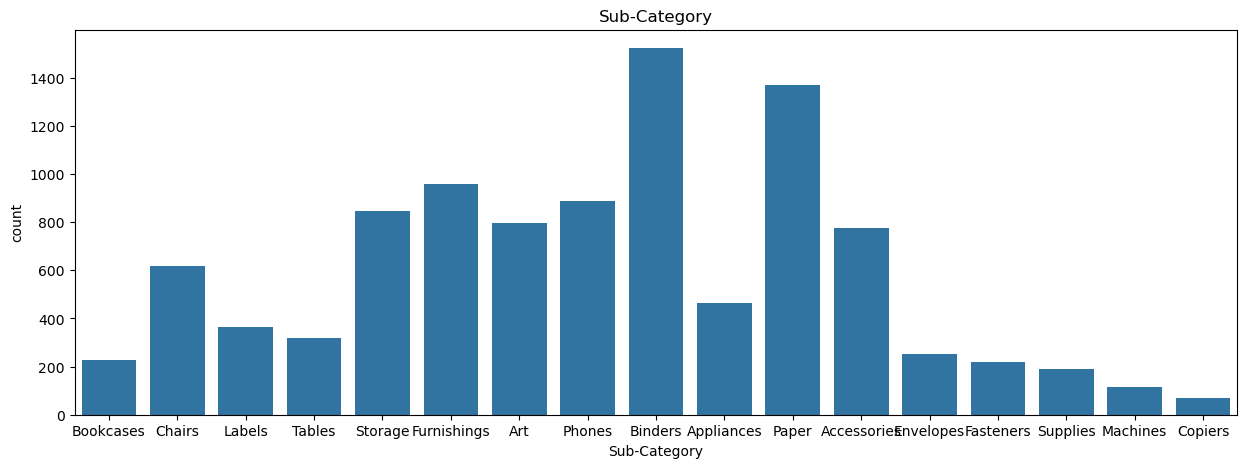

In [40]:
for i in cat_col:
    plt.figure(figsize=(15,5))
    sns.countplot(cat_data,x=i)
    plt.title(i)
    plt.show()

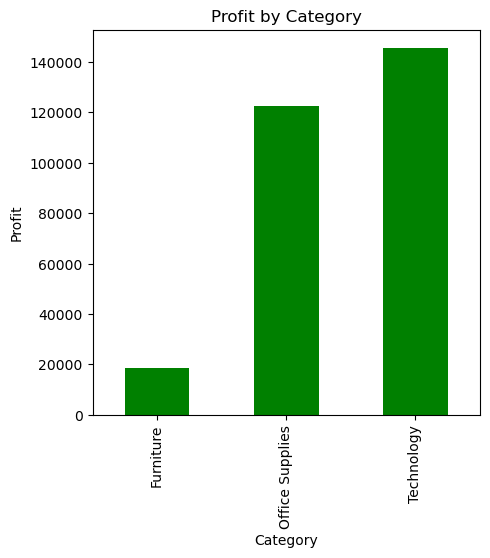

In [41]:
#Analysis of Profit by Category
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values()
plt.figure(figsize=(5,5))
profit_by_category.plot(kind='bar', color='green', title='Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

Even though most sales are in the "Office Supplies" category, the "Technology" category is the most profitable.

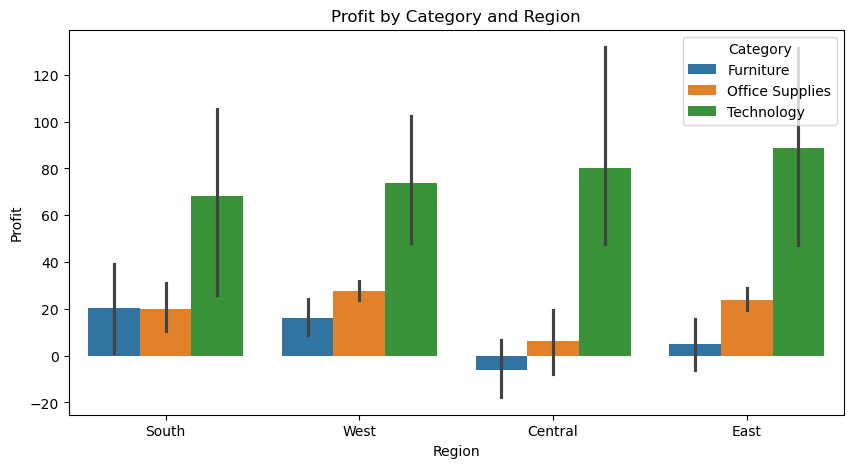

In [42]:
#Analysis of Profit by Category and Region
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Region', y='Profit', hue='Category')
plt.title('Profit by Category and Region')
plt.show()

The "Technology" category is the most profitable in every region.

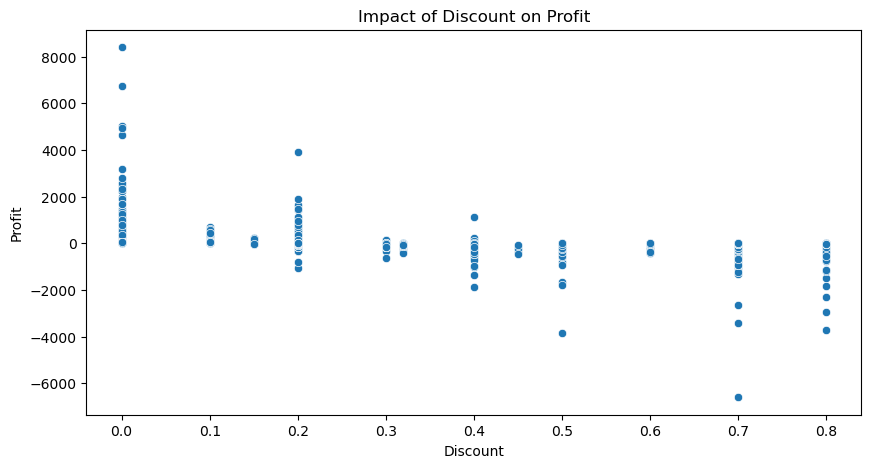

In [43]:
#Analysis of Discount on Profitability
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Impact of Discount on Profit')
plt.show()

When it comes to discounts on products, the highest discount we should be offering consumers is no more than 20%. A higher discount of 30% or more for example would likely produce unprofitable sales.

In [44]:
#Overall Sales, Profit, and Profitability

# Avoid division by zero by replacing 0 sales with NaN for profitability
df_clean = df.copy()
df_clean['Profitability'] = df_clean['Profit'] / df_clean['Sales']
df_clean['Profitability'] = df_clean['Profitability'].replace([float('inf'), -float('inf')], pd.NA)

# Calculate means
avg_sales = df_clean['Sales'].mean()
avg_profit = df_clean['Profit'].mean()
overall_profitability = df_clean['Profit'].sum() / df_clean['Sales'].sum()  

# Calculate medians
median_sales = df_clean['Sales'].median()
median_profit = df_clean['Profit'].median()
median_profitability = df_clean['Profitability'].median()

# Display the results
print("Averages for Entire Superstore Dataset:")
print(f"Average Sales:        ${avg_sales:.2f}")
print(f"Average Profit:       ${avg_profit:.2f}")
print(f"Overall Profitability: {overall_profitability:.3f}")

print("\nMedians for Entire Superstore Dataset:")
print(f"Median Sales:         ${median_sales:.2f}")
print(f"Median Profit:        ${median_profit:.2f}")
print(f"Median Profitability: {median_profitability:.3f}")

Averages for Entire Superstore Dataset:
Average Sales:        $229.86
Average Profit:       $28.66
Overall Profitability: 0.125

Medians for Entire Superstore Dataset:
Median Sales:         $54.49
Median Profit:        $8.67
Median Profitability: 0.270


The overall profitability resulted in a positive number which means that the superstore is operating profitably.

In [45]:
# Calculate total sales and profit per city
city_group = df.groupby('City')[['Sales', 'Profit']].sum()

# Calculate profitability
city_group['Profitability'] = city_group['Profit'] / city_group['Sales']

# Drop cities with zero sales to avoid division by zero
city_group = city_group[city_group['Sales'] > 0]

# Sort by profitability
city_sorted = city_group.sort_values('Profitability', ascending=False)

# Display top 10
top_10 = city_sorted.head(10)

# Display bottom 10
bottom_10 = city_sorted.tail(10)

print("🔝 Top 10 Cities by Profitability:")
print(top_10[['Sales', 'Profit', 'Profitability']])

print("\n🔻 Bottom 10 Cities by Profitability:")
print(bottom_10[['Sales', 'Profit', 'Profitability']])

🔝 Top 10 Cities by Profitability:
                Sales    Profit  Profitability
City                                          
Atlantic City   23.36   11.6800       0.500000
Grand Island    15.96    7.9800       0.500000
New Brunswick   14.77    7.1567       0.484543
Summerville    406.94  196.9132       0.483888
Holland        137.86   66.6588       0.483525
Lindenhurst     55.48   26.6304       0.480000
Antioch         19.44    9.3312       0.480000
Royal Oak       35.34   16.9632       0.480000
Davis           32.40   15.5520       0.480000
Bozeman         43.66   20.8106       0.476651

🔻 Bottom 10 Cities by Profitability:
                  Sales    Profit  Profitability
City                                            
Waco           606.1072 -520.1034      -0.858105
Champaign      151.9600 -182.3520      -1.200000
Tyler          347.2060 -443.7086      -1.277940
Littleton       72.2940  -98.8018      -1.366667
Deer Park        6.9240  -10.3860      -1.500000
Missouri City    6.37

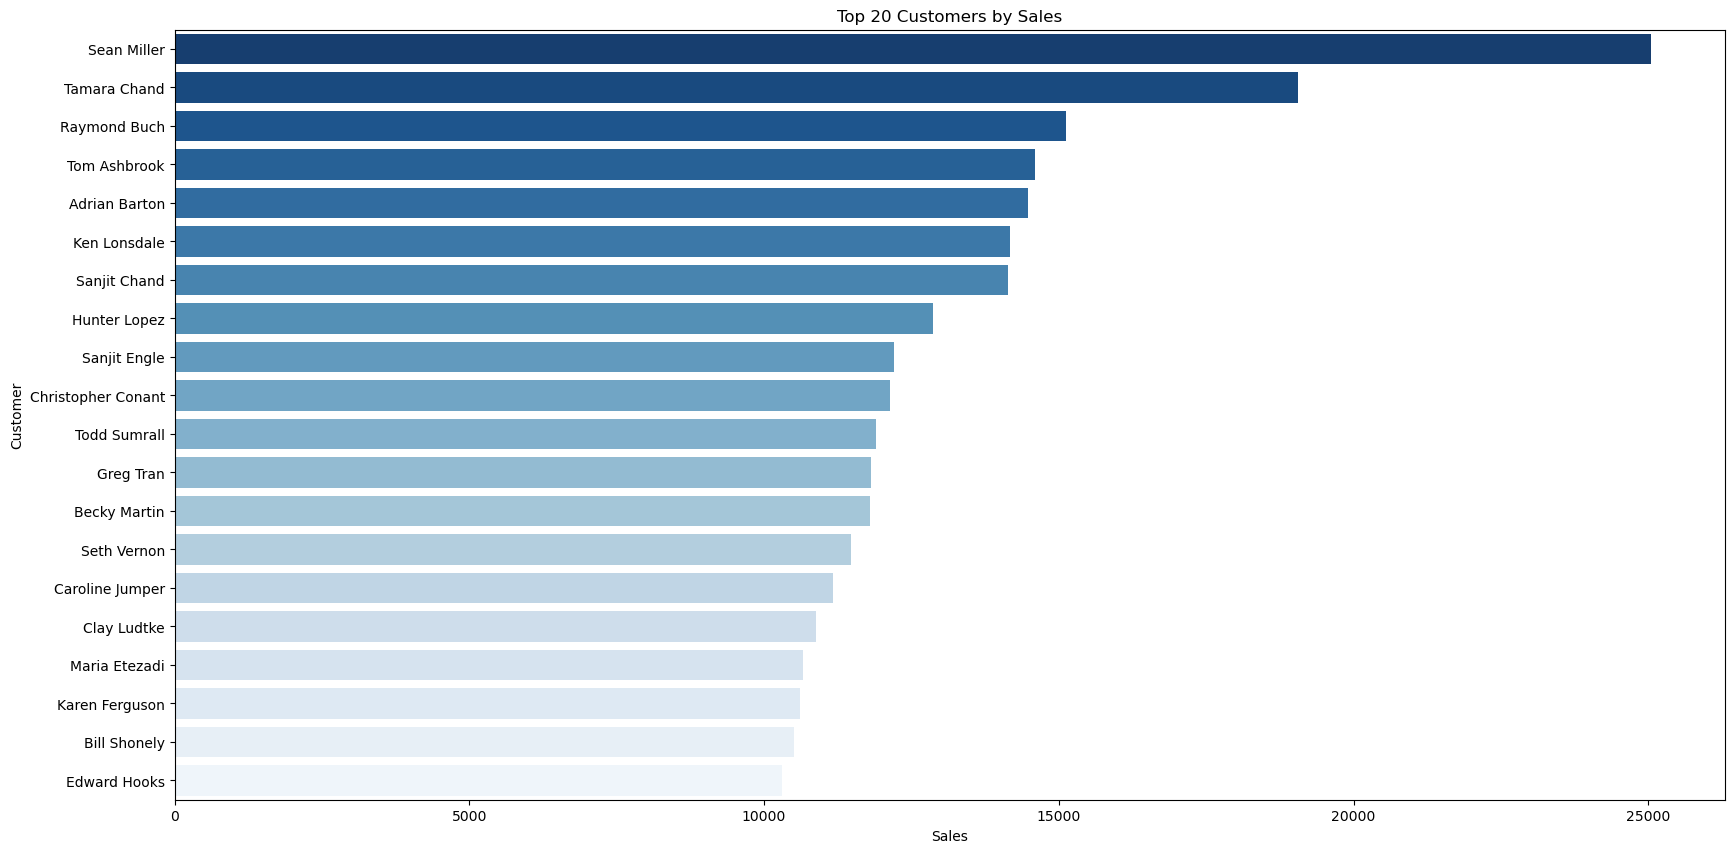

In [46]:
#Top 20 Customers by Sales

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)
top_customers_df = top_customers.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=top_customers_df,
            x='Sales',
            y='Customer Name',
            hue='Customer Name',
            palette="Blues_r")
plt.title('Top 20 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

In [47]:
df[df['Customer Name'] == 'Sean Miller']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,YearMonth,OrderY,OrderM,Discounted Sales,Sales per Quantity,Profit Margin,Shipping Time
2266,2267,CA-2017-149146,2017-10-12,2017-10-12,Same Day,SM-20320,Sean Miller,Home Office,United States,Monroe,...,2,0.2,2.6892,2017-10,2017,10,6.3744,3.984,0.337500,0
2573,2574,CA-2017-145128,2017-07-09,2017-07-14,Standard Class,SM-20320,Sean Miller,Home Office,United States,Lafayette,...,5,0.0,31.5870,2017-07,2017,7,526.4500,105.290,0.060000,5
2696,2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,4,0.5,-16.4260,2014-03,2014,3,410.6500,205.325,-0.020000,5
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,6,0.5,-1811.0784,2014-03,2014,3,11319.2400,3773.080,-0.080000,5
2698,2699,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,4,0.2,7.4816,2014-03,2014,3,17.1008,5.344,0.350000,5
2699,2700,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,3,0.2,1.0020,2014-03,2014,3,6.4128,2.672,0.125000,5
2700,2701,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,2,0.2,8.0766,2014-03,2014,3,24.6144,15.384,0.262500,5
2701,2702,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,3,0.2,5.9175,2014-03,2014,3,15.1488,6.312,0.312500,5
2702,2703,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,3,0.2,15.2940,2014-03,2014,3,97.8816,40.784,0.125000,5
7853,7854,CA-2015-144890,2015-12-25,2015-12-29,Standard Class,SM-20320,Sean Miller,Home Office,United States,Los Angeles,...,2,0.0,4.8804,2015-12,2015,12,9.9600,4.980,0.490000,4


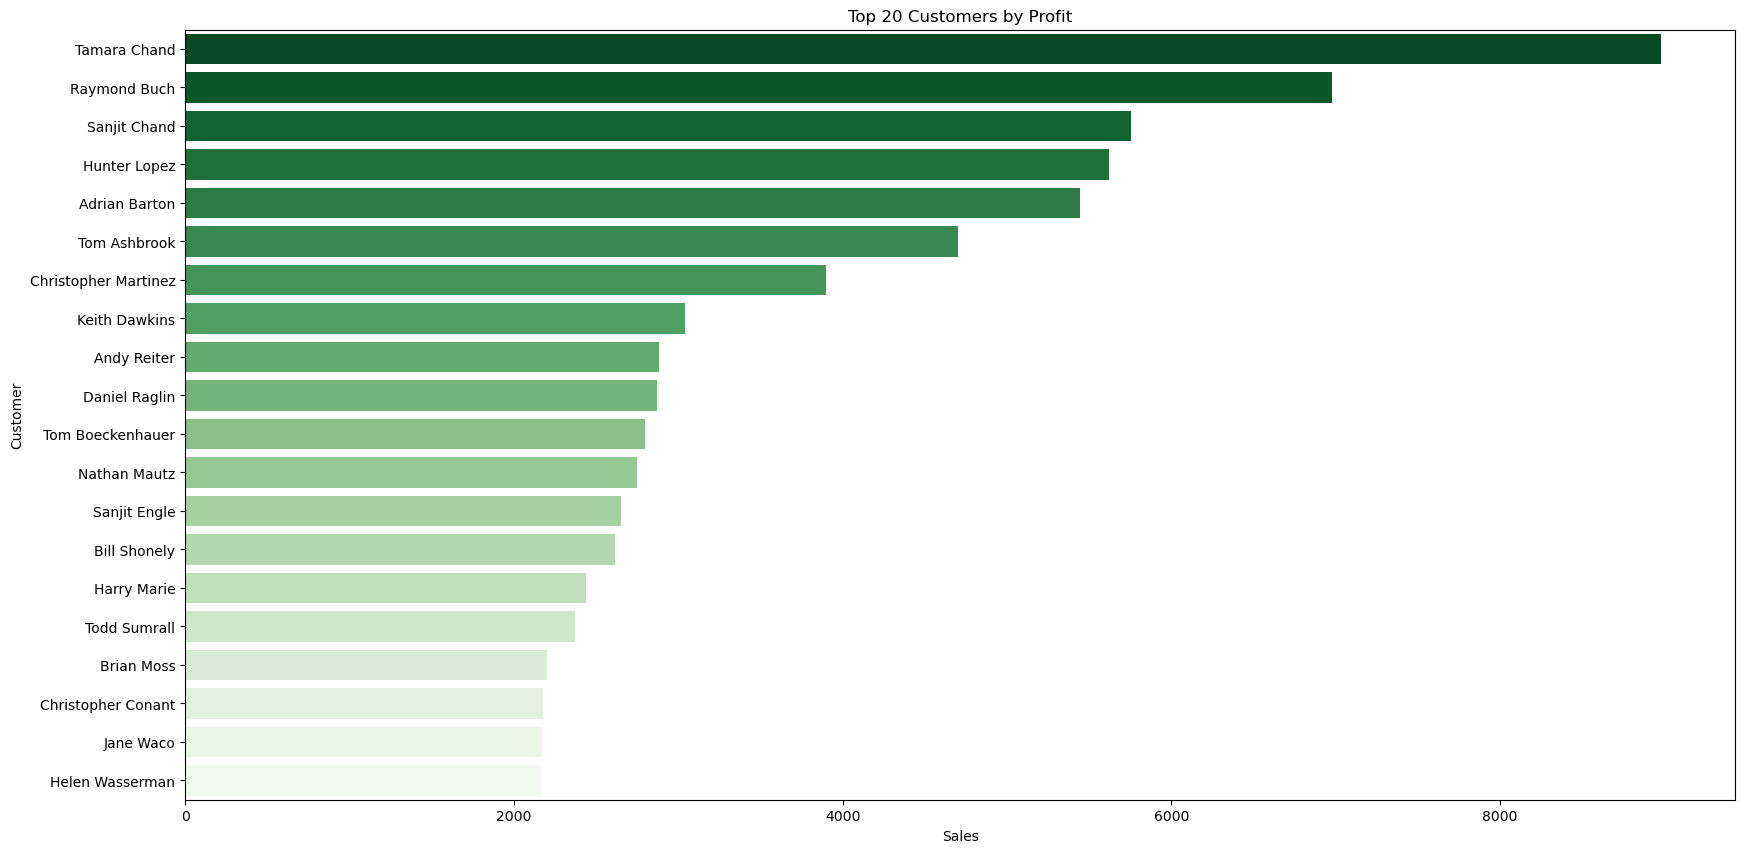

In [48]:
#Top 20 Customers by Profit

top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(20)
top_customers_df = top_customers.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=top_customers_df,
            x='Profit',
            y='Customer Name',
            hue='Customer Name',
            palette="Greens_r")
plt.title('Top 20 Customers by Profit')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

In [49]:
df[df['Customer Name'] == 'Tamara Chand']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,YearMonth,OrderY,OrderM,Discounted Sales,Sales per Quantity,Profit Margin,Shipping Time
2072,2073,CA-2016-129693,2016-11-26,2016-12-02,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Seattle,...,2,0.2,2.5592,2016-11,2016,11,5.8496,3.656,0.3500,6
3185,3186,CA-2014-123498,2014-11-07,2014-11-09,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,3,0.8,-44.2782,2014-11,2014,11,5.2092,8.682,-1.7000,2
3186,3187,CA-2014-123498,2014-11-07,2014-11-09,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,3,0.2,26.9526,2014-11,2014,11,59.4816,24.784,0.3625,2
6825,6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,2,0.0,4.8720,2016-10,2016,10,32.4800,16.240,0.1500,7
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,5,0.0,8399.9760,2016-10,2016,10,17499.9500,3499.990,0.4800,7
6827,6828,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,2,0.0,331.1910,2016-10,2016,10,735.9800,367.990,0.4500,7
6828,6829,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,7,0.0,16.8413,2016-10,2016,10,34.3700,4.910,0.4900,7
6829,6830,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,2,0.0,9.5088,2016-10,2016,10,33.9600,16.980,0.2800,7
8060,8061,CA-2015-156013,2015-09-20,2015-09-26,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,...,5,0.0,28.8580,2015-09,2015,9,61.4000,12.280,0.4700,6
8061,8062,CA-2015-156013,2015-09-20,2015-09-26,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,...,2,0.2,8.8624,2015-09,2015,9,19.5584,12.224,0.3625,6


Sean Miller contributes the most to our sales but Tamara Chand is our most profitable customer.

Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
Name: Profit, dtype: float64


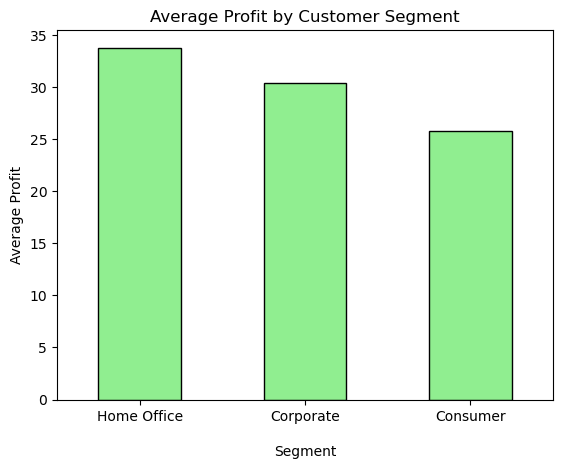

In [50]:
# Calculate average profit by segment
avg_profit_by_segment = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)

print(avg_profit_by_segment)

avg_profit_by_segment.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Profit by Customer Segment')
plt.ylabel('Average Profit')
plt.xlabel('\nSegment')
plt.xticks(rotation=0)
plt.show()

Our most profitable customers are in the "Home Office" and "Corporate" segments.

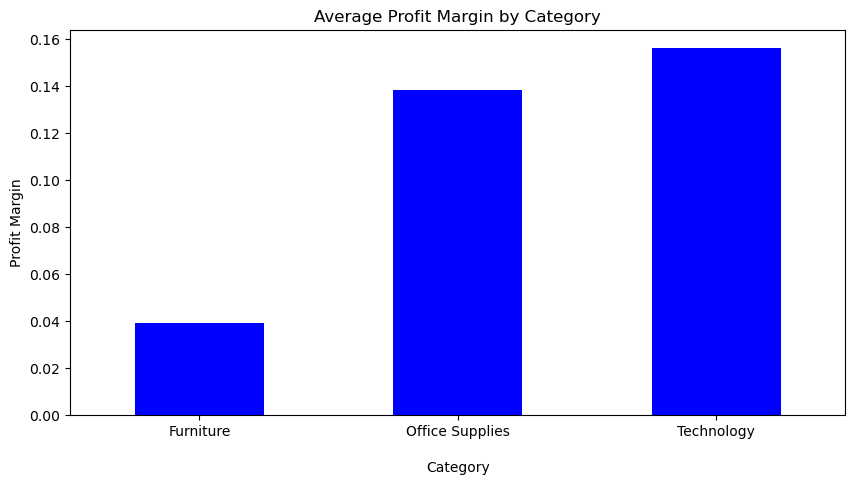

In [51]:
#Average Profit Margin by Category

margin_by_category = df.groupby('Category')['Profit Margin'].mean().sort_values()
plt.figure(figsize=(10,5)) 
margin_by_category.plot(kind='bar', color='blue')
plt.title('Average Profit Margin by Category')
plt.xticks(rotation=0)
plt.xlabel('\nCategory')
plt.ylabel('Profit Margin')
plt.show()

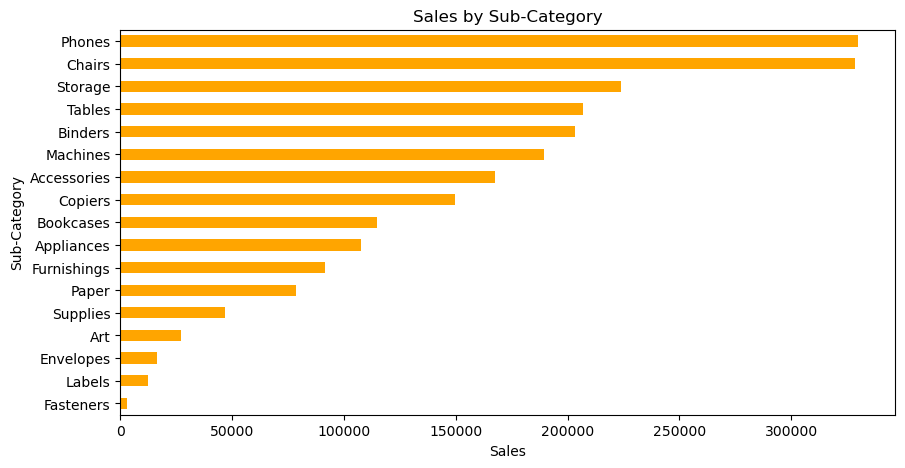

In [52]:
#Sales by Sub-Category

subcat_by_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,5))
subcat_by_sales.plot(kind='barh', color='orange')
plt.title('Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()

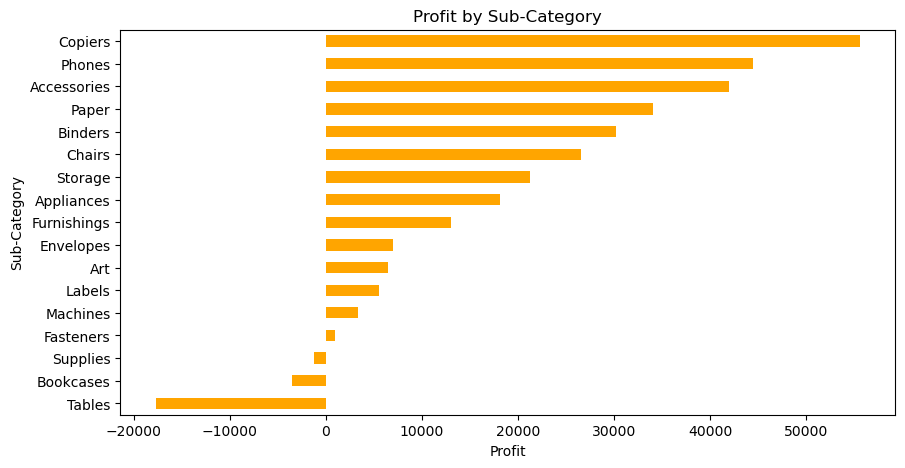

In [53]:
#Profit by Sub-Category

subcat_by_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,5))
subcat_by_profit.plot(kind='barh', color='orange')
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

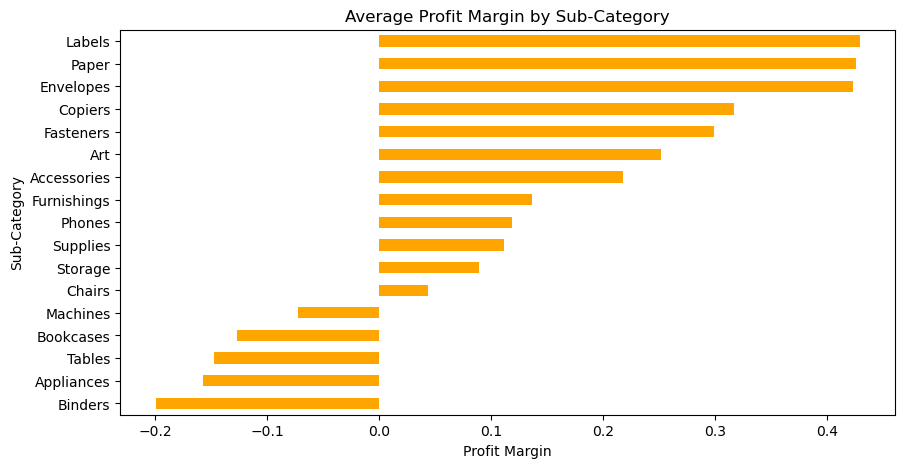

In [54]:
#Average Profit Margin by Sub-Category

margin_by_subcat = df.groupby('Sub-Category')['Profit Margin'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,5))
margin_by_subcat.plot(kind='barh', color='orange')
plt.title('Average Profit Margin by Sub-Category')
plt.xlabel('Profit Margin')
plt.ylabel('Sub-Category')
plt.show()

We can increase the quantity of the copiers, phones and chairs for more profits since those products are frequently bought.

Tables are our most unprofitable and also one our most bought products.

Things that can lead to the loss: high discount, high shipping cost. Is High Discount or High Shipping Cost the issue?

In [55]:
# Weighted discount for "Tables" sub-category
tables_df = df[df['Sub-Category'] == 'Tables']
weighted_discount_tables = (tables_df['Discount'] * tables_df['Sales']).sum() / tables_df['Sales'].sum()

# Weighted discount for the entire dataset
weighted_discount_total = (df['Discount'] * df['Sales']).sum() / df['Sales'].sum()

print(f"Tables Weighted Discount - Tables: {weighted_discount_tables:.3f}")
print(f"Total Weighted Discount - Total:  {weighted_discount_total:.3f}")



Tables Weighted Discount - Tables: 0.214
Total Weighted Discount - Total:  0.140


The discount on tables is high compared to the rest of the discounted products.

In [56]:
# Shipping mode distribution for Tables
tables_df = df[df['Sub-Category'] == 'Tables']
tables_shipping = tables_df['Ship Mode'].value_counts(normalize=True) * 100

# Shipping mode distribution for total dataset
total_shipping = df['Ship Mode'].value_counts(normalize=True) * 100

# Combine into one DataFrame
shipping_compare = pd.DataFrame({
    'Tables (%)': tables_shipping,
    'All Products (%)': total_shipping
}).fillna(0)

print(shipping_compare)

                Tables (%)  All Products (%)
Ship Mode                                   
Standard Class   59.561129         59.715829
Second Class     19.122257         19.461677
First Class      14.733542         15.389234
Same Day          6.583072          5.433260


There isnt a difference in shipping cost for tables compared to the rest of the products, so we can conclude that a high discount is negatively impacting our profitability on tables.

In [57]:
# Check the correlation
tables_df = df[df['Sub-Category'] == 'Tables']

correlation = tables_df['Discount'].corr(tables_df['Profit Margin'], method='pearson')

print("Correlation between Discount and Profitability (Tables):", correlation)

Correlation between Discount and Profitability (Tables): -0.929589449026205


Discounts and Profitability have a strong negative linear correlation for Tables and we have already observed that a discount above 20% for any product is likely going to lead to unprofitability.

In [58]:
dfcorrelation = df['Discount'].corr(df['Profit Margin'], method='pearson')
print('Correlation between Discount and Profitability (Dataset):', dfcorrelation)

Correlation between Discount and Profitability (Dataset): -0.8644522856000382


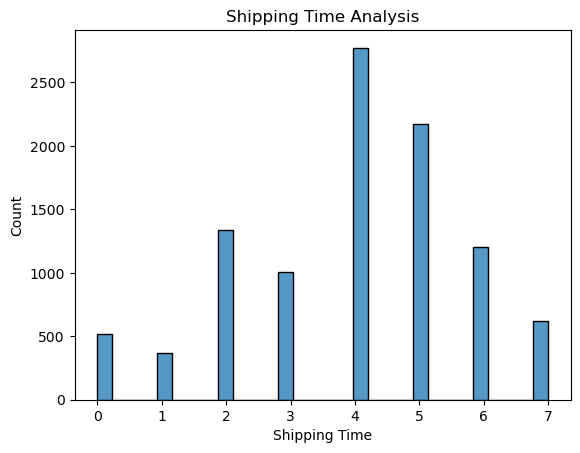

In [59]:
#Shipping Time Analysis

sns.histplot(df['Shipping Time'], bins=30)
plt.title('Shipping Time Analysis')
plt.show()

Text(0.5, 1.0, 'Sales increase per Year')

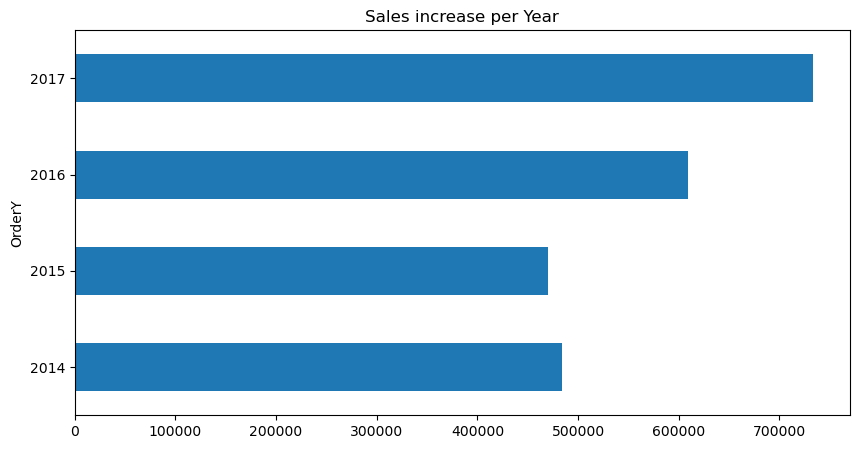

In [60]:
plt.figure(figsize=(10,5))
df.groupby('OrderY')['Sales'].sum().plot.barh()
plt.title('Sales increase per Year')

Text(0.5, 1.0, 'Profit increase per Year')

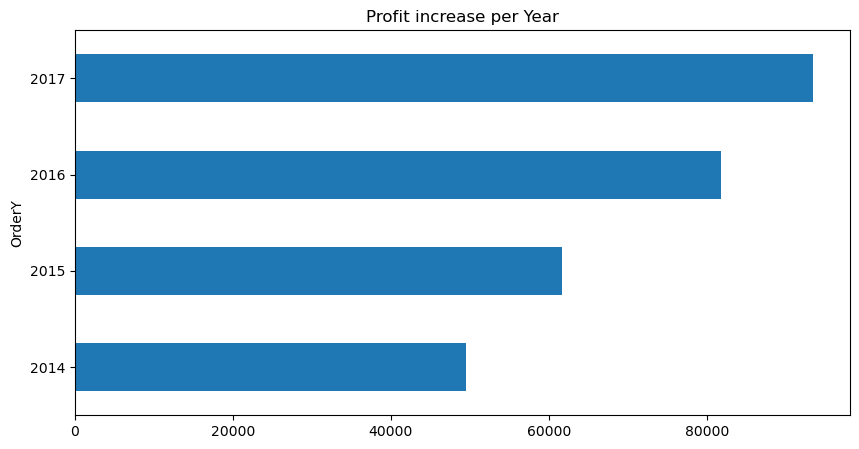

In [61]:
plt.figure(figsize=(10,5))
df.groupby('OrderY')['Profit'].sum().plot.barh()
plt.title('Profit increase per Year')

<Axes: title={'center': 'Monthly Sales trend over the years'}, xlabel='OrderY,OrderM'>

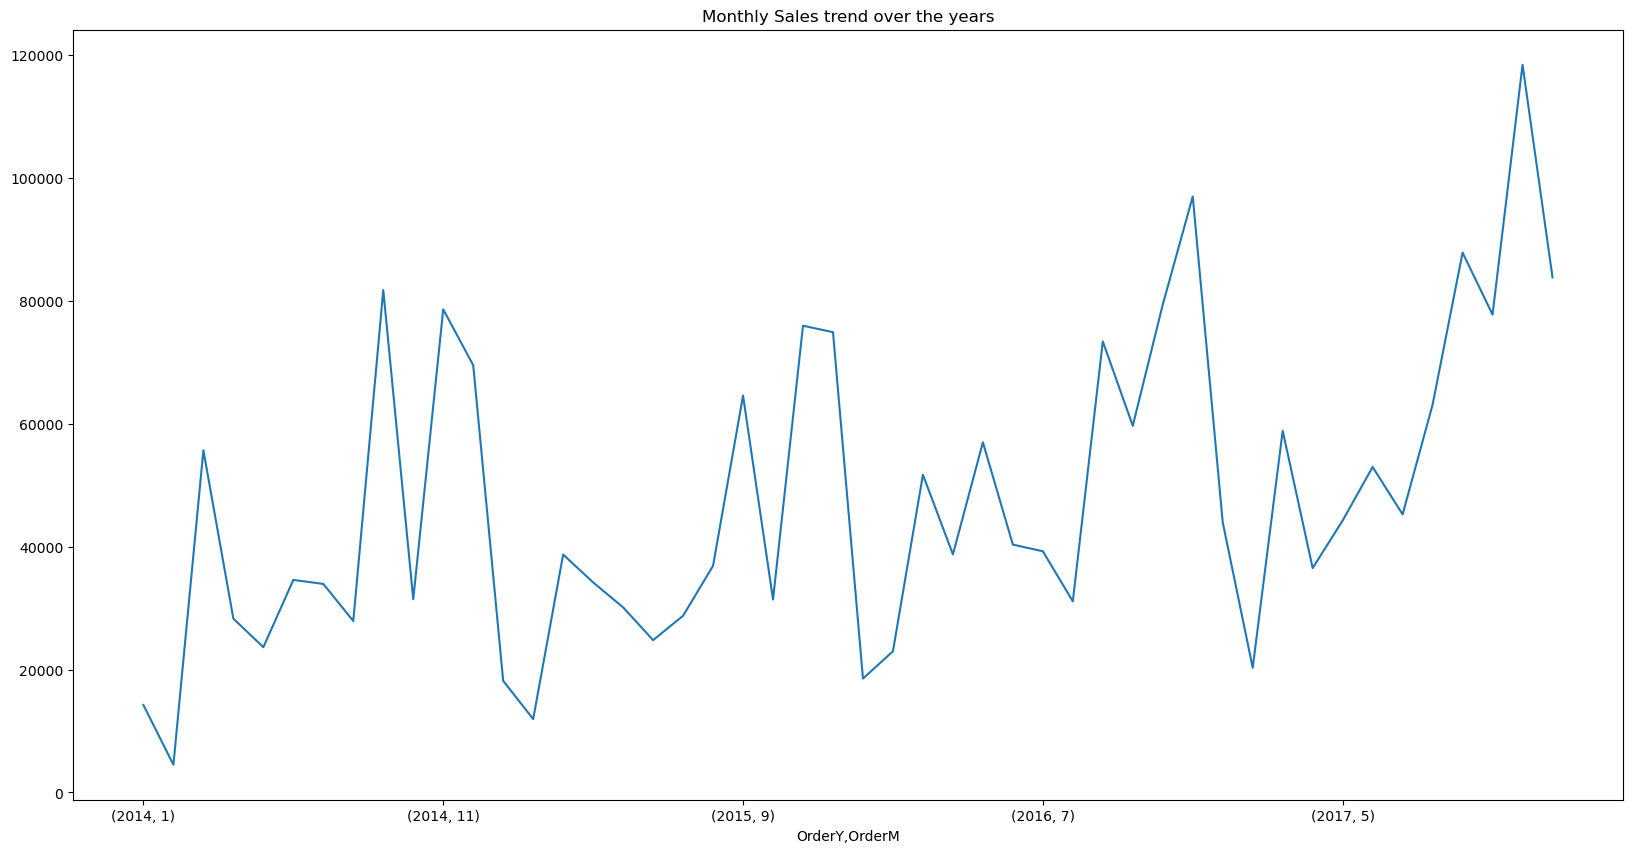

In [62]:
plt.figure(figsize=(20,10))
plt.title('Monthly Sales trend over the years')
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot()

<Axes: title={'center': 'Monthly Profit trend over the years'}, xlabel='OrderY,OrderM'>

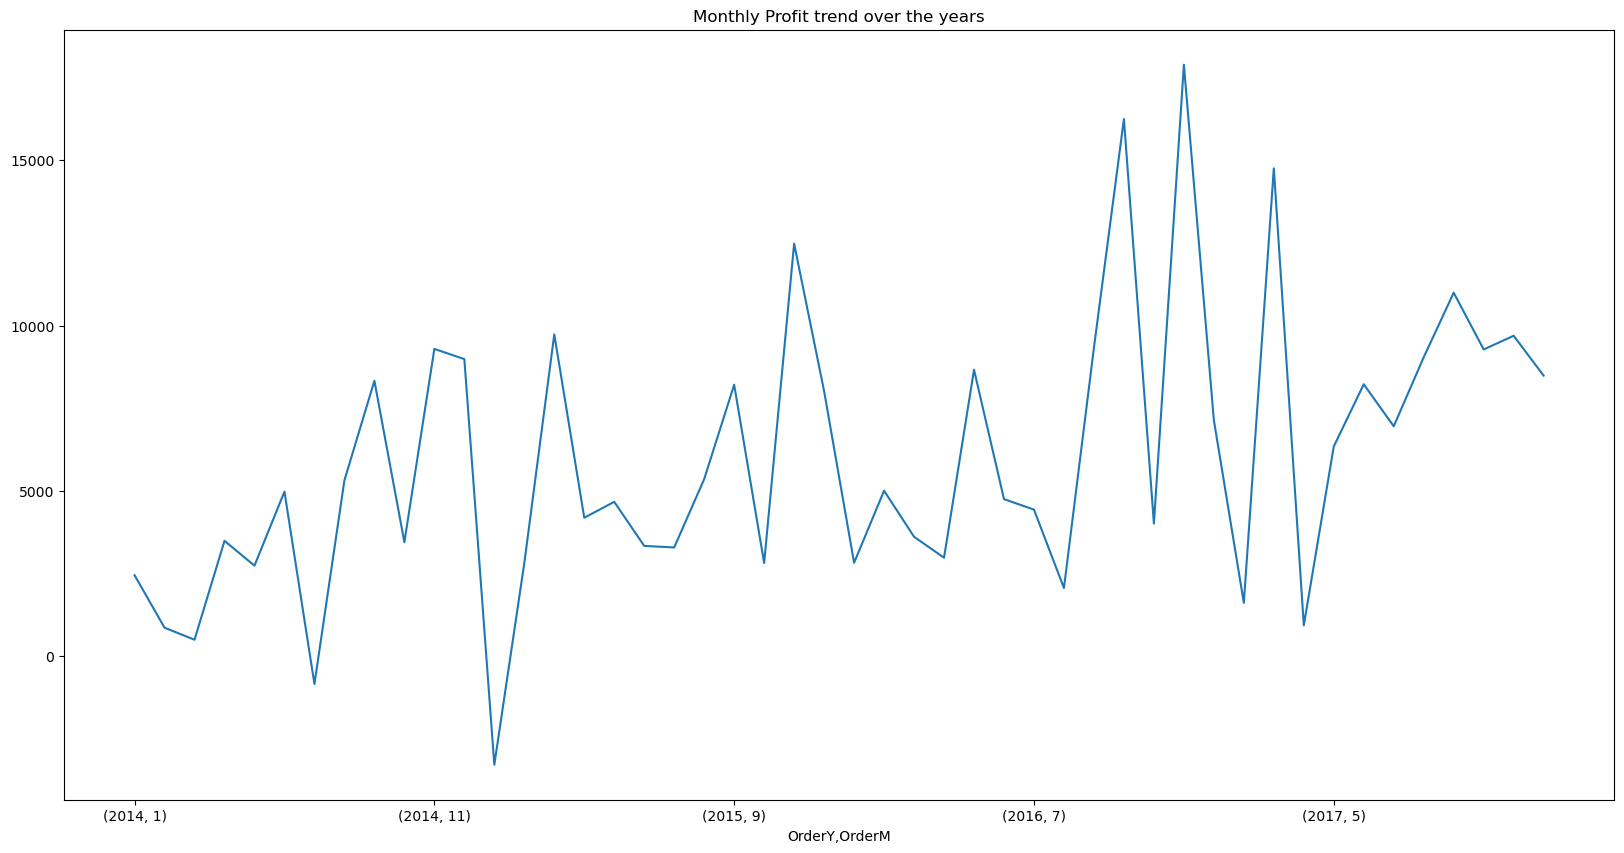

In [63]:
plt.figure(figsize=(20,10))
plt.title('Monthly Profit trend over the years')
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot()

As sales increase per year, our profit increases per year. This reaffirms our notion that the superstore is operating profitably.

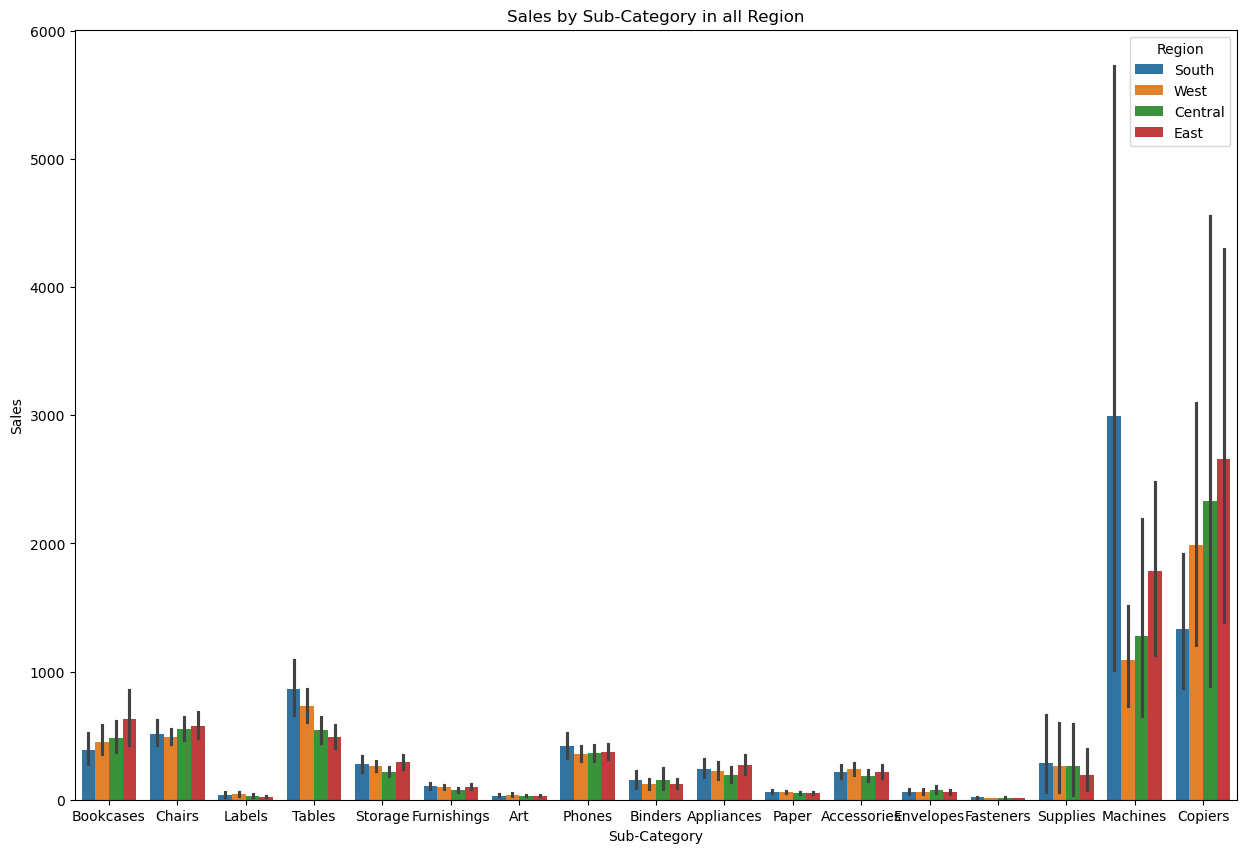

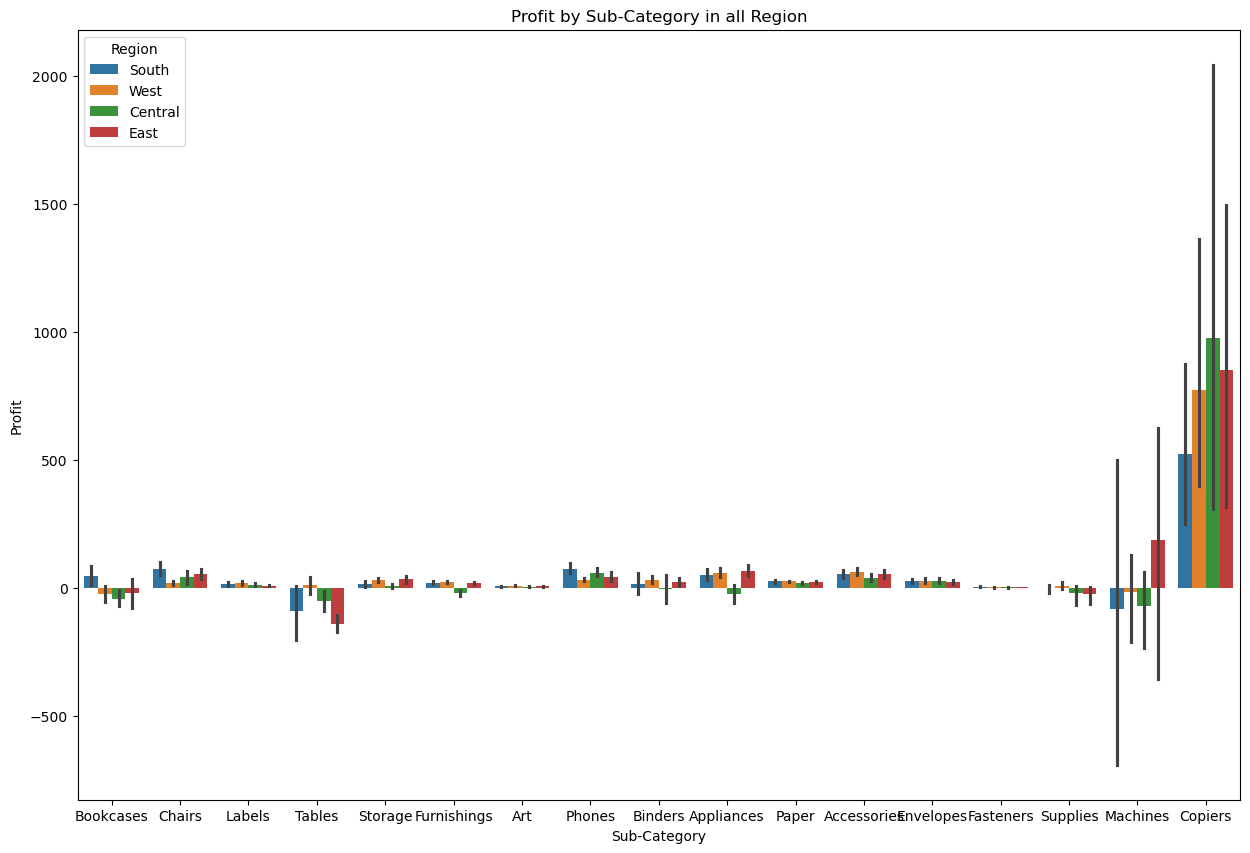

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Sub-Category',y='Sales',hue='Region')
plt.title('Sales by Sub-Category in all Region')
plt.show()

plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Sub-Category',y='Profit',hue='Region')
plt.title('Profit by Sub-Category in all Region')
plt.show()

The store has made most of its sales selling Machines in the south region but the profit margin is also the lowest there.

Copiers sold in the central region have the second highest sales and also the highest profit margin.

Copiers are the most profitable sub-category in each region.